<a href="https://colab.research.google.com/github/yohanesnuwara/formation-evaluation/blob/main/notebooks/northernlights_formation_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formation Evaluation of the Northern Lights CCS Field

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# install and import lasio
!pip install lasio
import lasio

In [ ]:
!git clone https://github.com/yohanesnuwara/formation-evaluation

Cloning into 'formation-evaluation'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 89 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (89/89), done.


In [ ]:
import sys
sys.path.append('/content/formation-evaluation')

from well_log_display import well_log_display
from triple_combo import triple_combo
from ND_plot import ND_plot

## Functions

In [ ]:
def well_log_display(df, column_depth, column_list, 
                     column_semilog=None, min_depth=None, max_depth=None, 
                     column_min=None, column_max=None, colors=None, 
                     fm_tops=None, fm_depths=None, 
                     tight_layout=1, title_size=10):
  """
  Display log side-by-side style

  Input:

  df is your dataframe
  specify min_depth and max_depth as the upper and lower depth limit
  column_depth is the column name of your depth
  column_list is the LIST of column names that you will display

  column_semilog is specific for resistivity column; if your resistivity is
    in column 3, specify as: column_semilog=2. Default is None, so if 
    you don't specify, the resistivity will be plotted in normal axis instead
  
  colors is the list of colors specified for each log names. Default is None,
    so if don't specify, the colors will be Matplotlib default (blue)

  fm_tops and fm_depths are the list of formation top names and depths.
    Default is None, so no tops are shown. Specify both lists, if you want
    to show the tops
  """
  
  import random

  if column_semilog==None:
    # column semilog not defined, RT will be plotted in normal axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])       
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)           
        ax[i].invert_yaxis()    


  else:
    # column semilog is defined, RT will be plotted in semilog axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        if i == 3:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth])
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])        
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        if i == 3:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth], color=colors[i])     
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')  
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])   
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)
        ax[i].invert_yaxis() 

  if fm_tops!=None and fm_depths!=None:
    # Formation tops and depths are specified, they will be shown

    # produce colors
    rgb = []
    for j in range(len(fm_tops)):
      _ = (random.random(), random.random(), random.random())
      rgb.append(_)

    for i in range(len(logs)):
      for j in range(len(fm_tops)):
        # rgb = (random.random(), random.random(), random.random())
        ax[i].axhline(y=fm_depths[j], linestyle=":", c=rgb[j], label=fm_tops[j])  
        # y = fm_depths[j] / (max_depth - min_depth)    
        # ax[i].text(0.5, y, fm_tops[j], fontsize=5, va='center', ha='center', backgroundcolor='w')

  # plt.legend()
  # plt.legend(loc='upper center', bbox_to_anchor=(-3, -0.05),
  #            fancybox=True, shadow=True, ncol=5)  
  
  plt.tight_layout(tight_layout)
  plt.show()   

In [ ]:
def triple_combo(df, column_depth, column_GR, column_resistivity, 
                 column_NPHI, column_RHOB, min_depth, max_depth, 
                 min_GR=0, max_GR=150, sand_GR_line=60,
                 min_resistivity=0.01, max_resistivity=1000, 
                 color_GR='black', color_resistivity='green', 
                 color_RHOB='red', color_NPHI='blue',
                 figsize=(6,10), tight_layout=1, 
                 title_size=15, title_height=1.05):
  """
  Producing Triple Combo log

  Input:

  df is your dataframe
  column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
  are column names that appear in your dataframe (originally from the LAS file)

  specify your depth limits; min_depth and max_depth

  input variables other than above are default. You can specify
  the values yourselves. 

  Output:

  Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)
  """
  
  import matplotlib.pyplot as plt
  from matplotlib.ticker import AutoMinorLocator  

  fig, ax=plt.subplots(1,3,figsize=(8,10))
  fig.suptitle('Triple Combo Log', size=title_size, y=title_height)

  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':', linewidth='1', color='black')

  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':', linewidth='1', color='black')

  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':', linewidth='1', color='black')  

  # First track: GR
  ax[0].get_xaxis().set_visible(False)
  ax[0].invert_yaxis()   

  gr=ax[0].twiny()
  gr.set_xlim(min_GR,max_GR)
  gr.set_xlabel('GR',color=color_GR)
  gr.set_ylim(max_depth, min_depth)
  gr.spines['top'].set_position(('outward',10))
  gr.tick_params(axis='x',colors=color_GR)
  gr.plot(df[column_GR], df[column_depth], color=color_GR)  

  gr.minorticks_on()
  gr.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  gr.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black') 

  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line>=df[column_GR]), color = 'gold', linewidth=0) # sand
  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line<df[column_GR]), color = 'lime', linewidth=0) # shale

  # Second track: Resistivity
  ax[1].get_xaxis().set_visible(False)
  ax[1].invert_yaxis()   

  res=ax[1].twiny()
  res.set_xlim(min_resistivity,max_resistivity)
  res.set_xlabel('Resistivity',color=color_resistivity)
  res.set_ylim(max_depth, min_depth)
  res.spines['top'].set_position(('outward',10))
  res.tick_params(axis='x',colors=color_resistivity)
  res.semilogx(df[column_resistivity], df[column_depth], color=color_resistivity)    

  res.minorticks_on()
  res.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')   

  # Third track: NPHI and RHOB
  ax[2].get_xaxis().set_visible(False)
  ax[2].invert_yaxis()  

  ## NPHI curve 
  nphi=ax[2].twiny()
  nphi.set_xlim(-0.15,0.45)
  nphi.invert_xaxis()
  nphi.set_xlabel('NPHI',color='blue')
  nphi.set_ylim(max_depth, min_depth)
  nphi.spines['top'].set_position(('outward',10))
  nphi.tick_params(axis='x',colors='blue')
  nphi.plot(df[column_NPHI], df[column_depth], color=color_NPHI)

  nphi.minorticks_on()
  nphi.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  nphi.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')     

  ## RHOB curve 
  rhob=ax[2].twiny()
  rhob.set_xlim(1.95,2.95)
  rhob.set_xlabel('RHOB',color='red')
  rhob.set_ylim(max_depth, min_depth)
  rhob.spines['top'].set_position(('outward',50))
  rhob.tick_params(axis='x',colors='red')
  rhob.plot(df[column_RHOB], df[column_depth], color=color_RHOB)

  # solution to produce fill between can be found here:
  # https://stackoverflow.com/questions/57766457/how-to-plot-fill-betweenx-to-fill-the-area-between-y1-and-y2-with-different-scal
  x2p, _ = (rhob.transData + nphi.transData.inverted()).transform(np.c_[df[column_RHOB], df[column_depth]]).T
  nphi.autoscale(False)
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="orange", alpha=0.4, where=(x2p > df[column_NPHI])) # hydrocarbon
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="blue", alpha=0.4, where=(x2p < df[column_NPHI])) # water

  res.minorticks_on()
  res.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.grid(which='minor', linestyle=':', linewidth='1', color='black')

  plt.tight_layout(tight_layout)  
  plt.show() 

In [ ]:
def ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by,
            figsize=(7,7), scatter_size=50, scatter_alpha=0.5):  
  """
  Producing Neutron-Density (Cross)plot

  Input:

  denfl is your fluid density
  df is your dataframe
  column_nphi and column_rhob are the column name of your NPHI and RHOB
  column_hue is the column name that you want for the color of the points
    e.g. depth, vshale, formation labels, etc. 
  
  color_by depends on the column_hue that you're giving
    * if you're giving a continuous hue (numerical) like depth or vshale
      define color_by='continuous'
    * if you're giving a categorical hue (labels) like formation names
      define color_by='categorical'
  
  figsize, scatter_size, scatter_alpha are by default. You can also specify
    by yourselves.

  Output:

  3 lines. Blue is sandstone, black is limestone, red is dolomite
  Each line has dots representing porosity value from 0 to 0.5
    by increment of 0.05 
  """

  import matplotlib.pyplot as plt
  import seaborn as sns  
  plt.style.use('seaborn')
  sns.set_theme(color_codes=True)

  lsX = np.arange(0, 0.55, 0.05)

  ssSNP = 0.222*lsX**2 + 1.021*lsX + 0.024
  dolSNP = 0.6*lsX**2 + 0.749*lsX - 0.00434

  ssCNL = 0.222*lsX**2 + 1.021*lsX + 0.039
  dolCNL = 1.40*lsX**2 + 0.389*lsX - 0.01259

  ssSnpX = np.empty((np.size(lsX),0), float)
  dolSnpX = np.empty((np.size(lsX),0), float)
  ssCnlX = np.empty((np.size(lsX),0), float)
  dolCnlX = np.empty((np.size(lsX),0), float)

  for i in np.nditer(lsX):
      ssSnpX = np.append(ssSnpX, np.roots([0.222, 1.021, 0.024 - i])[1])
      dolSnpX = np.append(dolSnpX, np.roots([0.6, 0.749, -0.00434 - i])[1])
      ssCnlX = np.append(ssCnlX, np.roots([0.222, 1.021, 0.039 - i])[1])
      dolCnlX = np.append(dolCnlX, np.roots([1.40, 0.389, -0.01259 - i])[1])

  densma_Ls = 2.71; densma_Ss = 2.65; densma_Dol = 2.87 #densma: density matrix

  denLs = (denfl - densma_Ls) * lsX + densma_Ls
  denSs = (denfl - densma_Ss) * lsX + densma_Ss
  denDol = (denfl - densma_Dol) * lsX + densma_Dol

  if color_by == 'continuous':
    # plot data with color of the continuous variable defined (depth, vsh, etc.)
    plt.figure(figsize=figsize)

    plt.scatter(df[column_nphi], df[column_rhob], c=df[column_hue],
                alpha=scatter_alpha, cmap='viridis')
    plt.colorbar()

    # plot the sand, limestone, and dolomite line (using Seaborn)
    plt.plot(ssCnlX, denSs, '.-', color='blue', markersize=10, label = 'Sandstone')
    plt.plot(lsX, denLs, '.-', color='black', markersize=10, label = 'Limestone')
    plt.plot(dolCnlX, denDol, '.-', color='red', markersize=10, label = 'Dolomite')
    
    plt.title('Neutron-Density Plot', size=20, pad=15)
    plt.xlim(-0.05, 0.45)
    plt.ylim(3, 1.9)
    plt.xlabel('NPHI (g/cc)'); plt.ylabel('RHOB (g/cc)')    

  if color_by == 'categorical':
    # plot data with color of each formation names (using Seaborn)
    lm = sns.lmplot(data=df, x=column_nphi, y=column_rhob, hue=column_hue, 
                    fit_reg=False, height=figsize[0],
                    scatter_kws={'s': scatter_size, 'alpha': scatter_alpha})

    ax = lm.axes

    # plot the sand, limestone, and dolomite line (using Seaborn)
    lines = pd.DataFrame({'ssCnlX': ssCnlX, 'lsX': lsX, 'dolCnlX': dolCnlX, 
                          'denLs': denLs, 'denSs': denSs, 'denDol': denDol})

    sns.lineplot(data=lines, x='ssCnlX', y='denSs', color='blue', 
                     legend=False, marker='o', ax=ax[0,0])
    sns.lineplot(data=lines, x='lsX', y='denLs', color='black', 
                 legend=False, marker='o', ax=ax[0,0])
    sns.lineplot(data=lines, x='dolCnlX', y='denDol', color='red', 
                 legend=False, marker='o', ax=ax[0,0])   

    plt.title('Neutron-Density Plot', size=20, pad=15)
    plt.xlim(-0.05, 0.45)
    plt.ylim(3, 1.9)
    plt.xlabel('NPHI (g/cc)'); plt.ylabel('RHOB (g/cc)')

    plt.show()

In [ ]:
def label_generator(df_well, df_tops, column_depth, label_name):
  """
  Generate Formation (or other) Labels to Well Dataframe
  (useful for EDA and machine learning purpose)

  Input:

  df_well is your well dataframe (that originally doesn't have the intended label)
  df_tops is your label dataframe (this dataframe should ONLY have 2 columns)
    1st column is the label name (e.g. formation top names)
    2nd column is the depth of each label name

  column_depth is the name of depth column on your df_well dataframe
  label_name is the name of label that you want to produce (e.g. FM. LABEL)

  Output:

  df_well is your dataframe that now has the labels (e.g. FM. LABEL)
  """
  import numpy as np
  import pandas as pd

  # generate list of formation depths and top names
  fm_tops = df_tops.iloc[:,0]  
  fm_depths = df_tops.iloc[:,1] 

  # create FM. LABEL column to well dataframe
  # initiate with NaNs
  df_well[label_name] = np.full(len(df_well), np.nan)  

  indexes = []
  topnames = []
  for j in range(len(fm_depths)):
    # search index at which the DEPTH in the well df equals to OR
    # larger than the DEPTH of each pick in the pick df
    if (df_well[column_depth].iloc[-1] > fm_depths[j]):
      index = df_well.index[(df_well[column_depth] >= fm_depths[j])][0]
      top = fm_tops[j]
      indexes.append(index)
      topnames.append(top)

  # replace the NaN in the LABEL column of well df
  # at the assigned TOP NAME indexes
  df_well[label_name].loc[indexes] = topnames

  # Finally, using pandas "ffill" to fill all the rows 
  # with the TOP NAMES
  df_well = df_well.fillna(method='ffill')  

  return df_well 

In [ ]:
def calculate_klogh(formation_name, phif, vsh):
  # there is no available equation for Heather Fm. 
  if formation_name == 'hugin':
    return 10 ** (2 + (8 * phif) - (9 * vsh))
  if formation_name == 'sleipner':
    return 10 ** (-3 + (32 * phif) - (2 * vsh))
  if formation_name == 'skagerak':
    return 10 ** (-1.85 + (17.4 * phif) - (3 * vsh))

## Load well logs

Input logs (CPI)

In [ ]:
# specify file path (well 31/5-7 EOS)
filepath = '/content/formation-evaluation/data/northernlights/WLC_PETRO_COMPUTED_INPUT_1.LAS'

# read with lasio
well = lasio.read(filepath)

Output logs (CPI)

In [ ]:
# specify file path (well 31/5-7 EOS)
filepath = '/content/formation-evaluation/data/northernlights/WLC_PETRO_COMPUTED_OUTPUT_1.LAS'
# filepath = '/content/WLC_PETRO_COMPUTED_OUTPUT_1.LAS'

# read with lasio
out = lasio.read(filepath)

In [ ]:
# check the available logs inside the data
well.keys()

['DEPTH',
 'CALI',
 'DRHO',
 'DT',
 'DTS',
 'GR',
 'KTIM',
 'NPHI',
 'PPC1_CALI_NORM',
 'RD',
 'RHOB',
 'RM',
 'RS',
 'RT',
 'RXO',
 'TVDMSL']

In [ ]:
# look for more detail inside the data
well.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="", descr="", original_mnemonic="DEPTH", data.shape=(19357,)),
 CurveItem(mnemonic="CALI", unit="IN", value="", descr="Caliper", original_mnemonic="CALI", data.shape=(19357,)),
 CurveItem(mnemonic="DRHO", unit="G/C3", value="", descr="Bulk density correction", original_mnemonic="DRHO", data.shape=(19357,)),
 CurveItem(mnemonic="DT", unit="US/F", value="", descr="IFC(DEPTH>2571.4,J9_R1_P1_MSIP_BESTDT_2F.DTCO_FINAL,DT)", original_mnemonic="DT", data.shape=(19357,)),
 CurveItem(mnemonic="DTS", unit="US/F", value="", descr="IFC(DEPTH>2567.4,J9_R1_P1_MSIP_BESTDT_2F.DTSH_FINAL,DTS)", original_mnemonic="DTS", data.shape=(19357,)),
 CurveItem(mnemonic="GR", unit="GAPI", value="", descr="Gamma-ray", original_mnemonic="GR", data.shape=(19357,)),
 CurveItem(mnemonic="KTIM", unit="MD", value="", descr="Timur/Coates permeability", original_mnemonic="KTIM", data.shape=(19357,)),
 CurveItem(mnemonic="NPHI", unit="V/V", value="", descr="IFC(DEPTH<2638.33,ST

In [ ]:
out.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="", descr="", original_mnemonic="DEPTH", data.shape=(6452,)),
 CurveItem(mnemonic="CARB_FLAG", unit="NONE", value="", descr="Carbonate cement flag, manually edited, 1 = cement", original_mnemonic="CARB_FLAG", data.shape=(6452,)),
 CurveItem(mnemonic="COAL_FLAG", unit="NONE", value="", descr="1=COAL", original_mnemonic="COAL_FLAG", data.shape=(6452,)),
 CurveItem(mnemonic="KLOGH", unit="MD", value="", descr="Horizontal permeability. Boosted in Johansen Fm. (if(KLOGH>400,KLOGH*2.5,KLOGH)", original_mnemonic="KLOGH", data.shape=(6452,)),
 CurveItem(mnemonic="PHIT", unit="V/V", value="", descr="IFC(COAL_FLAG>0.5,0,PHIT)", original_mnemonic="PHIT", data.shape=(6452,)),
 CurveItem(mnemonic="SAND_FLAG", unit="NONE", value="", descr="Sand flag", original_mnemonic="SAND_FLAG", data.shape=(6452,)),
 CurveItem(mnemonic="VSH", unit="UNITLESS", value="", descr="Volume of dry VSH", original_mnemonic="VSH", data.shape=(6452,))]

Merging input and output logs

In [ ]:
out['DEPTH']

array([1892.3508, 1892.5032, 1892.6556, ..., 2875.1784, 2875.3308,
       2875.4832])

In [ ]:
id = np.where(well['DEPTH']==1892.3508)[0][0]
print('Index of depth 1892.3508 m in the INPUT log is:', id)
check = well['DEPTH'][12418]
print('Depth at index 12417+1 in the INPUT log is:', check, 'm')

# check if input and output log match
if check == out['DEPTH'][1]:
  print('match')
else:
  print('not match')

Index of depth 1892.3508 m in the INPUT log is: 12417
Depth at index 12417+1 in the INPUT log is: 1892.5032 m
match


In [ ]:
# convert input and output las to dataframe
input = well.df().reset_index()
output = out.df().reset_index()

In [ ]:
# merge input and output df
well = input.merge(output, on=['DEPTH'])
well

,DEPTH,CALI,DRHO,DT,DTS,GR,KTIM,NPHI,PPC1_CALI_NORM,RD,RHOB,RM,RS,RT,RXO,TVDMSL,CARB_FLAG,COAL_FLAG,KLOGH,PHIT,SAND_FLAG,VSH
0,1892.3508,NaN,NaN,133.0340,NaN,163.4759,NaN,NaN,12.2390,1.7355,NaN,1.5018,1.4094,1.5766,NaN,1861.2841,NaN,NaN,NaN,NaN,0.0,0.6956
1,1892.5032,NaN,NaN,143.3587,NaN,169.1015,NaN,NaN,12.2415,1.6592,NaN,1.6291,1.6041,1.6848,NaN,1861.4365,NaN,NaN,NaN,NaN,0.0,0.7425
2,1892.6556,NaN,NaN,138.2003,NaN,192.5121,NaN,NaN,12.2484,1.6274,NaN,1.3411,1.3574,1.3609,NaN,1861.5889,NaN,NaN,NaN,NaN,0.0,0.9376
3,1892.8080,NaN,NaN,132.8561,NaN,221.3074,NaN,NaN,12.2499,1.5528,NaN,1.2150,1.2409,1.2092,NaN,1861.7413,NaN,NaN,NaN,NaN,0.0,1.1776
4,1892.9604,NaN,NaN,130.3214,NaN,240.5081,NaN,NaN,12.2450,1.4950,NaN,1.1425,1.1469,1.1238,NaN,1861.8937,NaN,NaN,NaN,NaN,0.0,1.3376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6447,2874.8736,8.4836,-0.0105,78.0493,136.1900,91.5509,0.0000,0.3416,NaN,3.2428,2.4791,3.5890,3.2137,3.2428,3.5291,2843.7749,NaN,NaN,0.0000,0.103599,0.0,0.3777
6448,2875.0260,8.4714,-0.0162,80.7558,137.8549,78.3731,0.0000,0.3418,NaN,1.8793,2.4205,1.8223,1.8830,1.8793,1.8857,2843.9272,NaN,NaN,0.0000,0.139068,0.0,0.2579
6449,2875.1784,8.4740,-0.0203,85.5174,141.5564,65.1954,0.0000,0.3277,NaN,1.4394,2.3609,1.4380,1.3872,1.4394,1.3867,2844.0796,NaN,NaN,0.0192,0.175232,0.0,0.1381
6450,2875.3308,8.4862,-0.0180,90.3524,146.4787,69.7041,0.0000,0.3575,NaN,1.6838,2.3306,1.2770,1.7424,1.6838,1.2162,2844.2319,NaN,NaN,0.0631,0.193589,0.0,0.1791


## Load formation tops data

In [ ]:
filepath = '/content/formation-evaluation/data/northernlights/Northernlights_wellpicks_modified.csv'
tops = pd.read_csv(filepath, encoding = "ISO-8859-1")

tops.tail(10)

,Formation tops,Depth (m TVD MSL),Depth (m TVD RKB),Depth (m MD RKB)
29,Cook 1,2654.0,2685.0,2685.0
30,Burton,2664.0,2695.0,2695.0
31,Johansen Fm. 4,2671.0,2702.0,2702.0
32,Johansen Fm. 3,2710.0,2741.0,2741.0
33,Johansen Fm. 2,2721.0,2752.0,2752.0
34,Johansen Fm. 1,2735.0,2766.0,2766.0
35,Amundsen,2787.0,2818.0,2818.0
36,Eriksson,2801.0,2832.0,2832.0
37,TD,2884.0,2915.0,2915.0
38,NaN,NaN,NaN,NaN


In [ ]:
# delete the last row with NaN
tops = tops.dropna()

# delete the 2nd and 3rd column (we'll only use 1st and last column)
# for our later use of "label_generator" function.
tops = tops.drop(tops.columns[[1,2]], axis=1)

# make list of formation tops and depths
fm_tops = list(tops.iloc[:,0].values)
fm_depths = list(tops.iloc[:,-1].values)

tops.tail(10)

,Formation tops,Depth (m MD RKB)
28,Cook 2,2642.0
29,Cook 1,2685.0
30,Burton,2695.0
31,Johansen Fm. 4,2702.0
32,Johansen Fm. 3,2741.0
33,Johansen Fm. 2,2752.0
34,Johansen Fm. 1,2766.0
35,Amundsen,2818.0
36,Eriksson,2832.0
37,TD,2915.0


## Visualize well logs and triple combo

In [ ]:
well.columns

Index(['DEPTH', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'KTIM', 'NPHI',
       'PPC1_CALI_NORM', 'RD', 'RHOB', 'RM', 'RS', 'RT', 'RXO', 'TVDMSL',
       'CARB_FLAG', 'COAL_FLAG', 'KLOGH', 'PHIT', 'SAND_FLAG', 'VSH'],
      dtype='object')

In [ ]:
well['NPHI_corrected'] = well['NPHI'] - 0.03

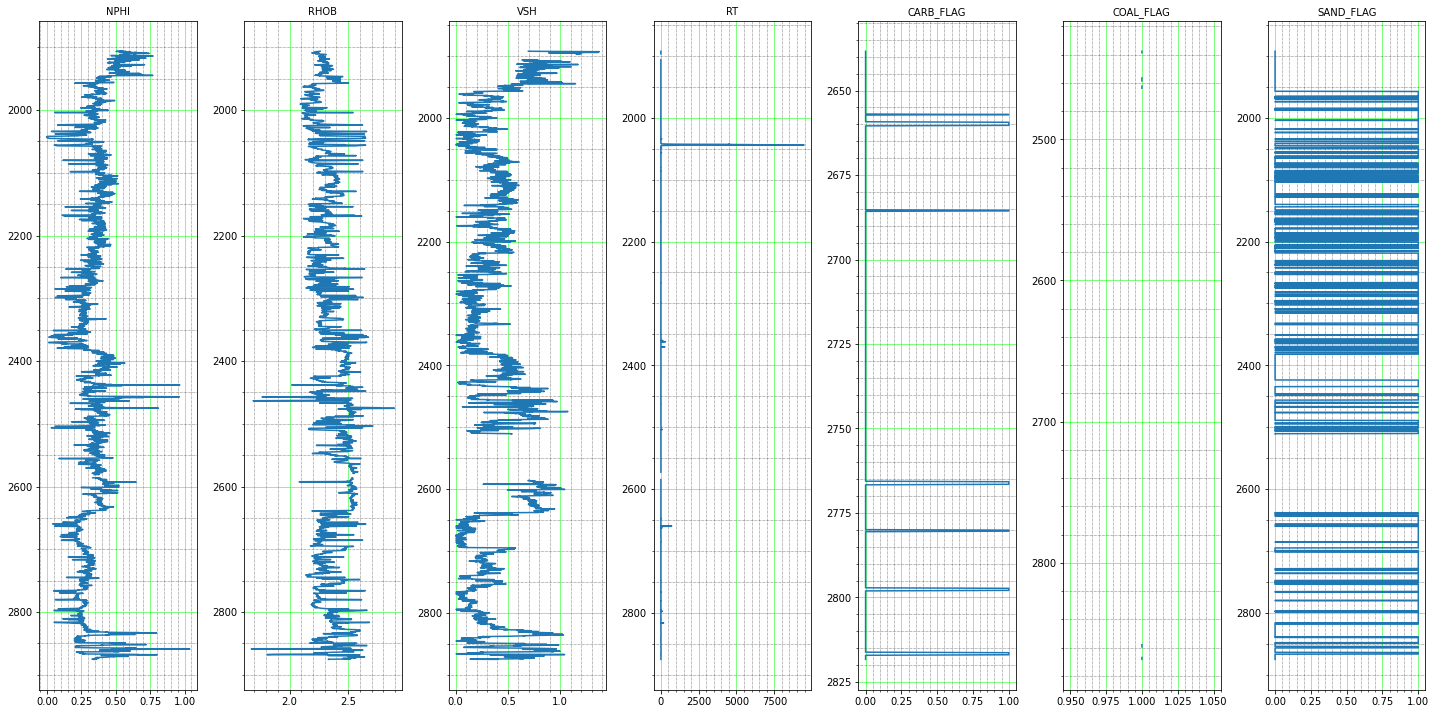

In [ ]:
# Leave all by default
# column_list = ['NPHI', 'RHOB', 'GR', 'RT', 'KTIM', 'CALI', 'DT', 'DTS']  
column_list = ['NPHI', 'RHOB', 'VSH', 'RT', 'CARB_FLAG', 'COAL_FLAG', 'SAND_FLAG']   

well_log_display(well, 'DEPTH', column_list)

In [ ]:
help(well_log_display)

Help on function well_log_display in module __main__:

well_log_display(df, column_depth, column_list, column_semilog=None, min_depth=None, max_depth=None, column_min=None, column_max=None, colors=None, fm_tops=None, fm_depths=None, tight_layout=1, title_size=10)
    Display log side-by-side style
    
    Input:
    
    df is your dataframe
    specify min_depth and max_depth as the upper and lower depth limit
    column_depth is the column name of your depth
    column_list is the LIST of column names that you will display
    
    column_semilog is specific for resistivity column; if your resistivity is
      in column 3, specify as: column_semilog=2. Default is None, so if 
      you don't specify, the resistivity will be plotted in normal axis instead
    
    colors is the list of colors specified for each log names. Default is None,
      so if don't specify, the colors will be Matplotlib default (blue)
    
    fm_tops and fm_depths are the list of formation top names and dept

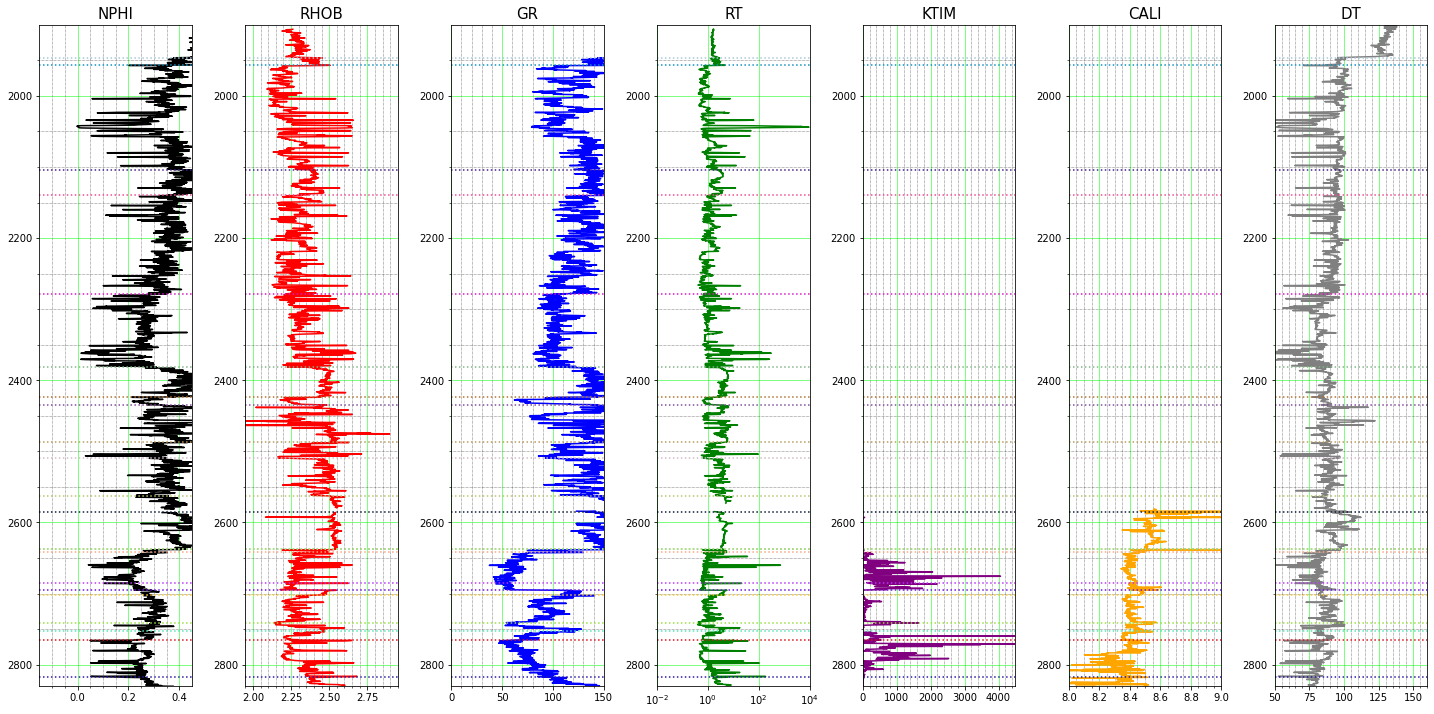

In [ ]:
column_list = ['NPHI', 'RHOB', 'GR', 'RT', 'KTIM', 'CALI', 'DT']
colors      = ['black', 'red', 'blue', 'green', 'purple', 'orange', 'grey']
column_min  = [-0.15, 1.95, 0, 0.01, 0, 8, 50]
column_max  = [0.45, 2.95, 150, 10000, 4500, 9, 160]      

well_log_display(well, 'DEPTH', column_list, 
                 column_semilog=3, column_min=column_min,column_max=column_max, 
                 min_depth=1900, max_depth=2830, colors=colors, title_size=15,
                 fm_tops=fm_tops, fm_depths=fm_depths)

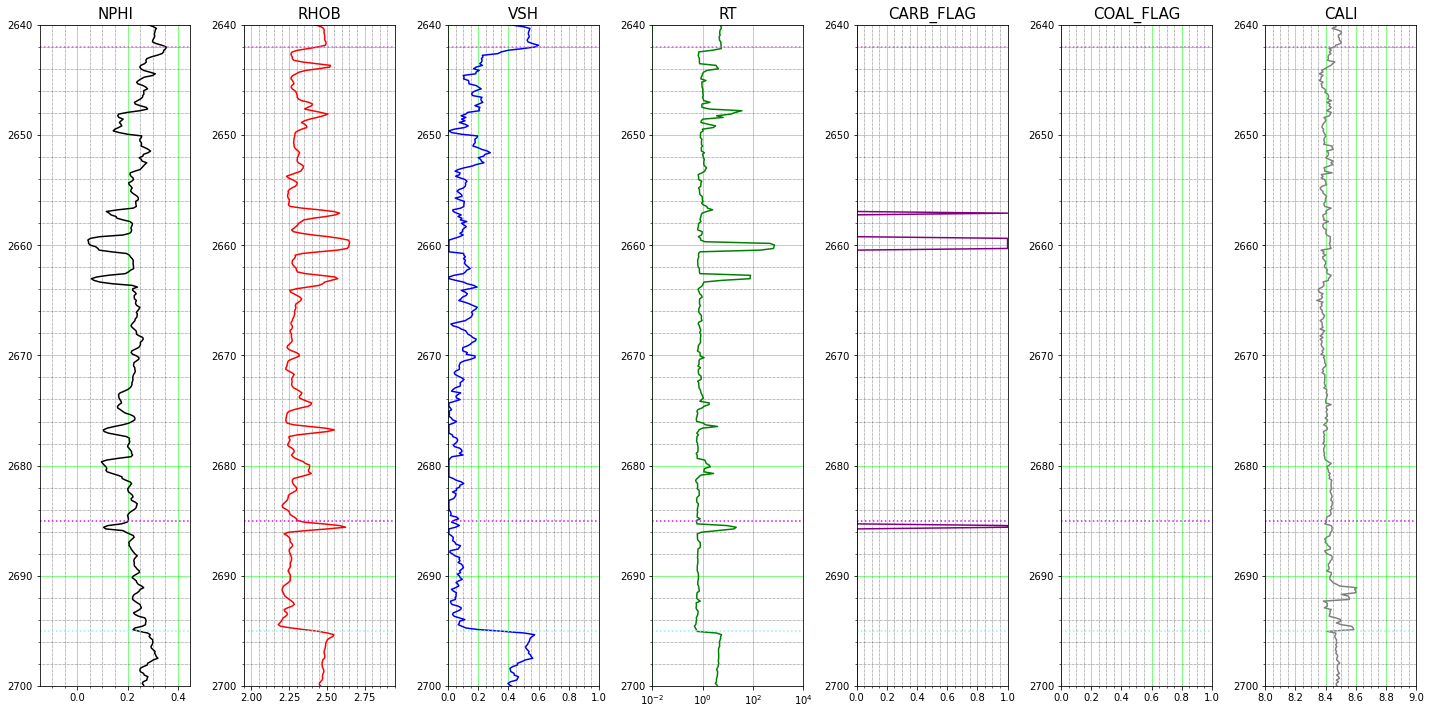

In [ ]:
column_list = ['NPHI', 'RHOB', 'VSH', 'RT', 'CARB_FLAG', 'COAL_FLAG', 'CALI'] 
colors      = ['black', 'red', 'blue', 'green', 'purple', 'orange', 'grey']
column_min  = [-0.15, 1.95, 0, 0.01, 0, 0, 8]
column_max  = [0.45, 2.95, 1, 10000, 1, 1, 9]   

well_log_display(well, 'DEPTH', column_list, 
                 column_semilog=3, column_min=column_min,column_max=column_max, 
                 min_depth=2640, max_depth=2700, colors=colors, title_size=15,
                 fm_tops=fm_tops, fm_depths=fm_depths)                 

Triple combo

In [ ]:
help(triple_combo)

Help on function triple_combo in module __main__:

triple_combo(df, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth, min_GR=0, max_GR=150, sand_GR_line=60, min_resistivity=0.01, max_resistivity=1000, color_GR='black', color_resistivity='green', color_RHOB='red', color_NPHI='blue', figsize=(6, 10), tight_layout=1, title_size=15, title_height=1.05)
    Producing Triple Combo log
    
    Input:
    
    df is your dataframe
    column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
    are column names that appear in your dataframe (originally from the LAS file)
    
    specify your depth limits; min_depth and max_depth
    
    input variables other than above are default. You can specify
    the values yourselves. 
    
    Output:
    
    Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)



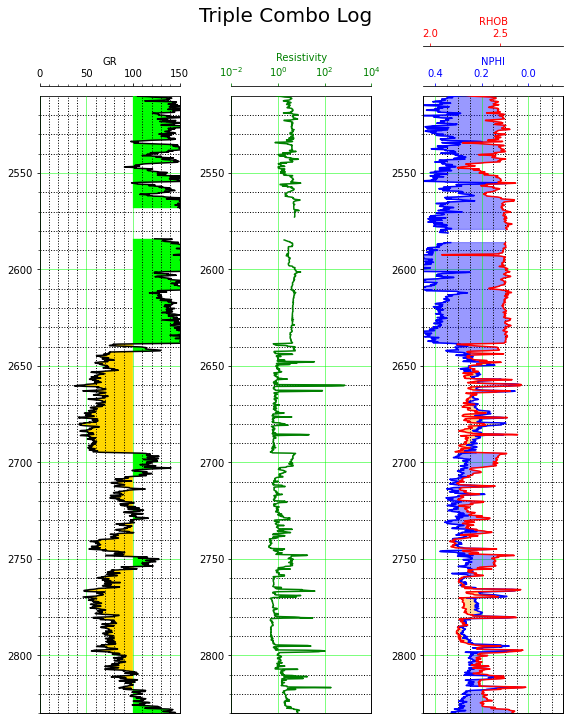

In [ ]:
triple_combo(well, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB', 
             min_depth=2510, max_depth=2830, 
             min_GR=0, max_GR=150, sand_GR_line=100,
             max_resistivity=10000,
             figsize=(8,8), title_size=20, title_height=1)

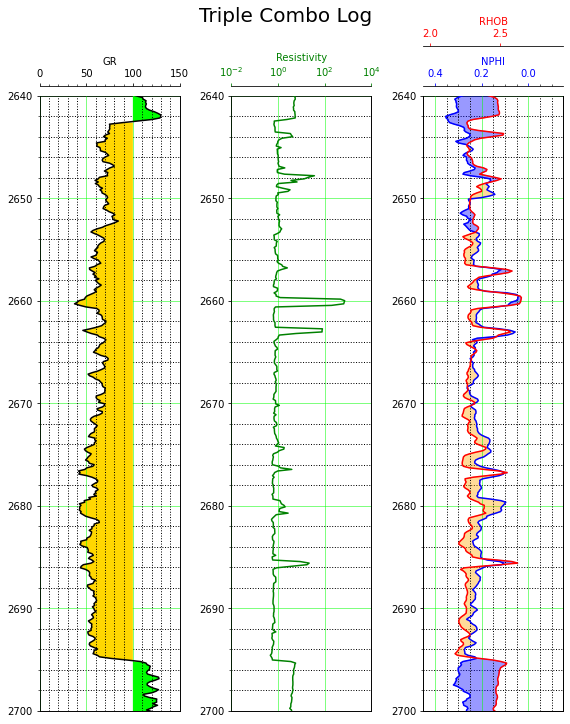

In [ ]:
triple_combo(well, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB', 
             min_depth=2640, max_depth=2700, 
             min_GR=0, max_GR=150, sand_GR_line=100,
             max_resistivity=10000,
             figsize=(8,8), title_size=20, title_height=1)

## Generate formation labels for the well log

In [ ]:
def label_generator(df_well, df_tops, column_depth, label_name):
  """
  Generate Formation (or other) Labels to Well Dataframe
  (useful for EDA and machine learning purpose)

  Input:

  df_well is your well dataframe (that originally doesn't have the intended label)
  df_tops is your label dataframe (this dataframe should ONLY have 2 columns)
    1st column is the label name (e.g. formation top names)
    2nd column is the depth of each label name

  column_depth is the name of depth column on your df_well dataframe
  label_name is the name of label that you want to produce (e.g. FM. LABEL)

  Output:

  df_well is your dataframe that now has the labels (e.g. FM. LABEL)
  """
  import numpy as np
  import pandas as pd

  # generate list of formation depths and top names
  fm_tops = df_tops.iloc[:,0]  
  fm_depths = df_tops.iloc[:,1] 

  # create FM. LABEL column to well dataframe
  # initiate with NaNs
  df_well[label_name] = np.full(len(df_well), np.nan)  

  indexes = []
  topnames = []
  for j in range(len(fm_depths)):
    # search index at which the DEPTH in the well df equals to OR
    # larger than the DEPTH of each pick in the pick df
    if (df_well[column_depth].iloc[-1] > fm_depths[j]):
      index = df_well.index[(df_well[column_depth] >= fm_depths[j])][0]
      top = fm_tops[j]
      indexes.append(index)
      topnames.append(top)

  # replace the NaN in the LABEL column of well df
  # at the assigned TOP NAME indexes
  df_well[label_name].loc[indexes] = topnames

  # Finally, using pandas "ffill" to fill all the rows 
  # with the TOP NAMES
  df_well = df_well.fillna(method='ffill')  

  return df_well 

In [ ]:
# generate formation labels using "label_generator" function
well = label_generator(well, tops, 'DEPTH', 'FM. LABEL')
well

,DEPTH,CALI,DRHO,DT,DTS,GR,KTIM,NPHI,PPC1_CALI_NORM,RD,RHOB,RM,RS,RT,RXO,TVDMSL,CARB_FLAG,COAL_FLAG,KLOGH,PHIT,SAND_FLAG,VSH,FM. LABEL
0,1892.3508,NaN,NaN,133.0340,NaN,163.4759,NaN,NaN,12.2390,1.7355,NaN,1.5018,1.4094,1.5766,NaN,1861.2841,NaN,NaN,NaN,NaN,0.0,0.6956,Draupne
1,1892.5032,NaN,NaN,143.3587,NaN,169.1015,NaN,NaN,12.2415,1.6592,NaN,1.6291,1.6041,1.6848,NaN,1861.4365,NaN,NaN,NaN,NaN,0.0,0.7425,Draupne
2,1892.6556,NaN,NaN,138.2003,NaN,192.5121,NaN,NaN,12.2484,1.6274,NaN,1.3411,1.3574,1.3609,NaN,1861.5889,NaN,NaN,NaN,NaN,0.0,0.9376,Draupne
3,1892.8080,NaN,NaN,132.8561,NaN,221.3074,NaN,NaN,12.2499,1.5528,NaN,1.2150,1.2409,1.2092,NaN,1861.7413,NaN,NaN,NaN,NaN,0.0,1.1776,Draupne
4,1892.9604,NaN,NaN,130.3214,NaN,240.5081,NaN,NaN,12.2450,1.4950,NaN,1.1425,1.1469,1.1238,NaN,1861.8937,NaN,NaN,NaN,NaN,0.0,1.3376,Draupne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6447,2874.8736,8.4836,-0.0105,78.0493,136.1900,91.5509,0.0000,0.3416,3.2816,3.2428,2.4791,3.5890,3.2137,3.2428,3.5291,2843.7749,0.0,1.0,0.0000,0.103599,0.0,0.3777,Eriksson
6448,2875.0260,8.4714,-0.0162,80.7558,137.8549,78.3731,0.0000,0.3418,3.2816,1.8793,2.4205,1.8223,1.8830,1.8793,1.8857,2843.9272,0.0,1.0,0.0000,0.139068,0.0,0.2579,Eriksson
6449,2875.1784,8.4740,-0.0203,85.5174,141.5564,65.1954,0.0000,0.3277,3.2816,1.4394,2.3609,1.4380,1.3872,1.4394,1.3867,2844.0796,0.0,1.0,0.0192,0.175232,0.0,0.1381,Eriksson
6450,2875.3308,8.4862,-0.0180,90.3524,146.4787,69.7041,0.0000,0.3575,3.2816,1.6838,2.3306,1.2770,1.7424,1.6838,1.2162,2844.2319,0.0,1.0,0.0631,0.193589,0.0,0.1791,Eriksson


## Neutron Density Plots

Analysis is only in the Dunlin Gp (2510-2830 m)

In [ ]:
well = well[(well['DEPTH'] >= 2510) & (well['DEPTH'] <= 2830)]
well

,DEPTH,CALI,DRHO,DT,DTS,GR,KTIM,NPHI,PPC1_CALI_NORM,RD,RHOB,RM,RS,RT,RXO,TVDMSL,CARB_FLAG,COAL_FLAG,KLOGH,PHIT,SAND_FLAG,VSH,NPHI_corrected,FM. LABEL
4053,2510.0280,12.0385,-0.0191,92.6249,170.5310,105.7569,NaN,0.3085,11.8298,0.8665,2.2759,0.7964,0.8199,0.8665,0.4836,2478.9604,NaN,1.0,23.1171,0.241794,1.0,0.2734,0.2785,Drake 2
4054,2510.1804,12.0235,-0.0203,91.5701,171.7697,105.5087,NaN,0.3115,11.8297,0.8965,2.2954,0.8352,0.9234,0.8965,0.5742,2479.1128,NaN,1.0,13.9019,0.229825,1.0,0.3033,0.2815,Drake 2
4055,2510.3328,12.0646,-0.0137,89.5373,170.5116,111.1016,NaN,0.3231,11.8459,1.3662,2.3431,1.2855,1.4153,1.3662,0.8031,2479.2651,NaN,1.0,3.8349,0.200579,1.0,0.3850,0.2931,Drake 2
4056,2510.4852,12.1768,-0.0054,87.1111,168.5657,118.1699,NaN,0.3434,11.8428,1.6610,2.3944,1.5746,1.8539,1.6610,1.4953,2479.4177,NaN,1.0,0.8817,0.169074,0.0,0.4887,0.3134,Drake 2
4057,2510.6376,12.1806,-0.0016,86.9568,164.7251,120.0263,NaN,0.3423,11.9320,1.9175,2.4316,1.8421,2.4112,1.9175,1.9726,2479.5701,NaN,1.0,0.3592,0.146237,0.0,0.5321,0.3123,Drake 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,2829.3060,8.5081,-0.0110,77.7206,142.8869,139.5768,0.0,0.3239,3.2816,6.7810,2.5869,7.2220,8.2759,6.7810,8.1286,2798.2197,0.0,1.0,0.0000,0.038271,0.0,0.7112,0.2939,Amundsen
6149,2829.4584,8.4959,-0.0119,77.9186,143.9860,142.2045,0.0,0.3302,3.2816,6.8754,2.5863,7.3359,8.4134,6.8754,8.0528,2798.3721,0.0,1.0,0.0000,0.038622,0.0,0.7232,0.3002,Amundsen
6150,2829.6108,8.5172,-0.0109,78.5412,144.9173,145.6109,0.0,0.3144,3.2816,6.9255,2.5845,7.3987,8.4843,6.9255,8.1900,2798.5244,0.0,1.0,0.0000,0.039700,0.0,0.6895,0.2844,Amundsen
6151,2829.7632,8.5023,-0.0096,78.9173,145.2020,140.6184,0.0,0.3134,3.2816,7.0280,2.5841,7.5358,8.5852,7.0280,8.5628,2798.6768,0.0,1.0,0.0000,0.039946,0.0,0.6869,0.2834,Amundsen


In [ ]:
well['FM. LABEL'].unique()

array(['Drake 2', 'Drake 1', 'Drake Intra Marine Shale Acoustic marker',
       'Cook 3', 'Cook 2', 'Cook 1', 'Burton', 'Johansen Fm. 4',
       'Johansen Fm. 3', 'Johansen Fm. 2', 'Johansen Fm. 1', 'Amundsen'],
      dtype=object)

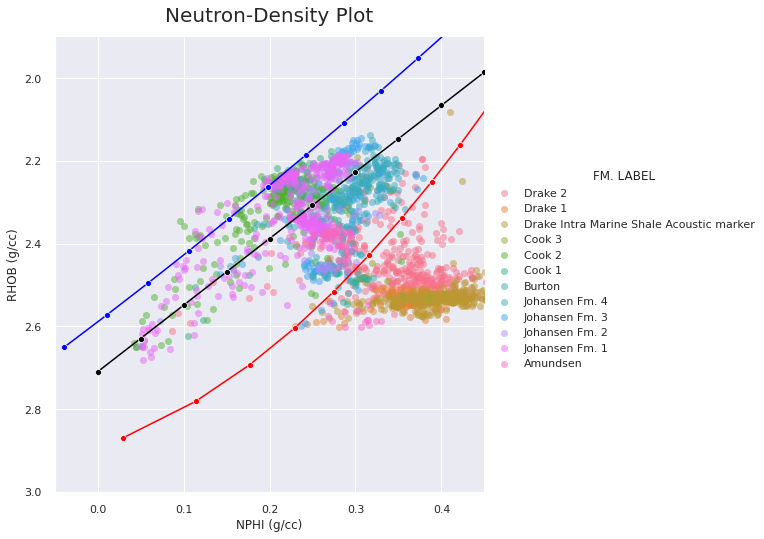

In [ ]:
ND_plot(1.1, well, 'NPHI', 'RHOB', 'FM. LABEL', color_by='categorical')


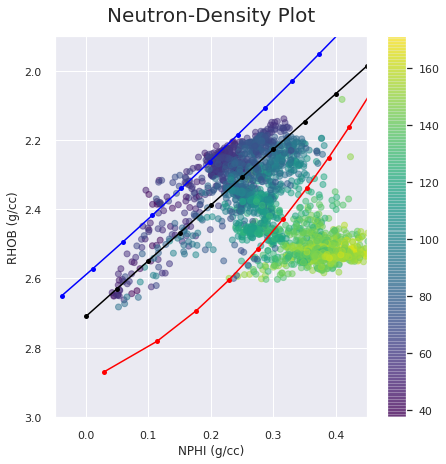

In [ ]:
ND_plot(1.1, well, 'NPHI', 'RHOB', 'GR', color_by='continuous')

In [ ]:
johan1 = well[well['FM. LABEL'].str.contains('Fm. 1')]
johan2 = well[well['FM. LABEL'].str.contains('Fm. 2')]
johan3 = well[well['FM. LABEL'].str.contains('Fm. 3')]
johan4 = well[well['FM. LABEL'].str.contains('Fm. 4')]
drake1 = well[well['FM. LABEL'].str.contains('Drake 1')]
drake2 = well[well['FM. LABEL'].str.contains('Drake 2')]
drake_intra = well[well['FM. LABEL'].str.contains('Intra')]


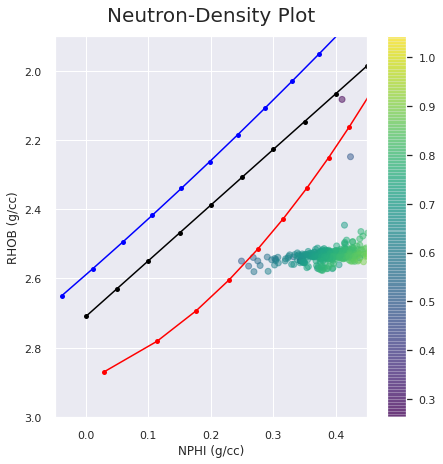

In [ ]:
ND_plot(1.1, drake_intra, 'NPHI', 'RHOB', 'VSH', color_by='continuous')


In [ ]:
def well_log_display(df, column_depth, column_list, 
                     column_semilog=None, min_depth=None, max_depth=None, 
                     column_min=None, column_max=None, colors=None, 
                     fm_tops=None, fm_depths=None, petrel_style_mode='off', 
                     tight_layout=1, title_size=10):
  """
  Display well logs side-by-side style
  (also support style of Schlumberger Petrel color-filled well log)

  Input:

  df is your dataframe
  specify min_depth and max_depth as the upper and lower depth limit
  column_depth is the column name of your depth
  column_list is the LIST of column names that you will display

  column_semilog is specific for resistivity column; if your resistivity is
    in column 3, specify as: column_semilog=2. Default is None, so if 
    you don't specify, the resistivity will be plotted in normal axis instead
  
  colors is the list of colors specified for each log names. Default is None,
    so if don't specify, the colors will be Matplotlib default (blue)

  fm_tops and fm_depths are the list of formation top names and depths.
    Default is None, so no tops are shown. Specify both lists, if you want
    to show the tops

  petrel_style_mode is to produce color-filled logs imitating the ones
    produced in Petrel Schlumberger software. Default is 'off', and no colors
    inside the logs. Turn 'on' to produce this type of plot.
  """
  
  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  import random

  if column_semilog==None:
    # column semilog not defined, RT will be plotted in normal axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])       
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)           
        ax[i].invert_yaxis()    


  else:
    # column semilog is defined, RT will be plotted in semilog axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        if i == 3:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth])
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])        
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        if i == 3:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth], color=colors[i])     
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')  
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])   
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)
        ax[i].invert_yaxis() 

  if fm_tops!=None and fm_depths!=None:
    # Formation tops and depths are specified, they will be shown

    # produce colors
    rgb = []
    for j in range(len(fm_tops)):
      _ = (random.random(), random.random(), random.random())
      rgb.append(_)

    for i in range(len(logs)):
      for j in range(len(fm_tops)):
        # rgb = (random.random(), random.random(), random.random())
        ax[i].axhline(y=fm_depths[j], linestyle=":", c=rgb[j], label=fm_tops[j])  
        # y = fm_depths[j] / (max_depth - min_depth)    
        # ax[i].text(0.5, y, fm_tops[j], fontsize=5, va='center', ha='center', backgroundcolor='w')

  # plt.legend()
  # plt.legend(loc='upper center', bbox_to_anchor=(-3, -0.05),
  #            fancybox=True, shadow=True, ncol=5)  
  
  plt.tight_layout(tight_layout)
  plt.show()  

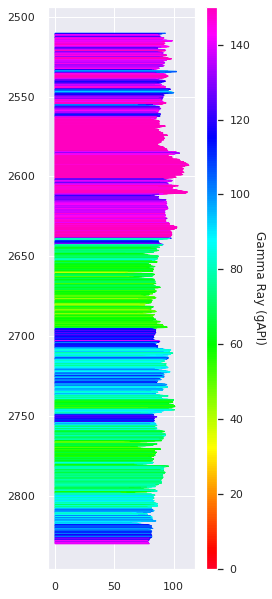

In [ ]:
import matplotlib as mpl

# Some Test data
npts = len(well['DEPTH'].values)
x = well['DEPTH'].values
y = well['DT'].values
z = well['GR'].values
normalize = mpl.colors.Normalize(vmin=0, vmax=150)

# Select a color map
cmap = mpl.cm.gist_rainbow

# The plot
fig = plt.figure(figsize=(3,10))
ax = fig.add_axes([0.12, 0.12, 0.68, 0.78])

# plt.plot(x, y, color="gray")
for i in range(npts - 1):
    plt.fill_betweenx([x[i], x[i+1]], [y[i], y[i+1]], color=cmap(normalize(z[i]))) # this code is changed (between to betweenx)

plt.gca().invert_yaxis() # invert y axis for depth
cbax = fig.add_axes([0.85, 0.12, 0.05, 0.78])
cb = mpl.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb.set_label("Gamma Ray (gAPI)", rotation=270, labelpad=15)
plt.show()

## Petrophysical Calculation per Formation Top

Next we will calculate new petrophysical variables PER FORMATION LABEL (only Heather, Hugin, and Sleipner). First thing we need to do is to "mask the subset of dataframe in FM. LABEL column that contains each of the above names".

In [ ]:
# create masks for Heather, Hugin, and Sleipner 
mask_heather = df['FM. LABEL'].str.contains('Heather')
mask_hugin = df['FM. LABEL'].str.contains('Hugin')
mask_sleipner = df['FM. LABEL'].str.contains('Sleipner')

# see inside the mask
mask_sleipner

0        False
1        False
2        False
3        False
4        False
         ...  
11196     True
11197     True
11198     True
11199     True
11200     True
Name: FM. LABEL, Length: 11201, dtype: bool

Now isolate Heather, Hugin, and Sleipner into individual subsets of Dataframe, using the masks that we made before.

In [ ]:
# create dataframe subsets of Heather, Hugin, and Sleipner
df_heather = df[mask_heather]
df_hugin = df[mask_hugin]
df_sleipner = df[mask_sleipner]

# print the Heather subset
df_hugin

,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI,DT,FM. LABEL
9946,3594.6,0.230,2.553,56.027,7.286,7.810,8.672,75.703,Hugin Fm. VOLVE Top
9947,3594.7,0.212,2.538,47.892,9.203,7.733,8.672,76.451,Hugin Fm. VOLVE Top
9948,3594.8,0.194,2.521,38.756,13.707,7.653,8.672,77.458,Hugin Fm. VOLVE Top
9949,3594.9,0.182,2.504,30.654,15.150,7.556,8.672,78.711,Hugin Fm. VOLVE Top
9950,3595.0,0.175,2.483,26.218,13.737,7.448,8.672,80.014,Hugin Fm. VOLVE Top
...,...,...,...,...,...,...,...,...,...
11015,3701.5,0.256,2.250,50.468,1.104,5.706,8.625,90.992,Hugin Fm. VOLVE Top
11016,3701.6,0.253,2.252,51.350,1.180,5.756,8.625,90.240,Hugin Fm. VOLVE Top
11017,3701.7,0.246,2.254,49.164,1.247,5.833,8.656,89.164,Hugin Fm. VOLVE Top
11018,3701.8,0.243,2.254,48.651,1.277,5.923,8.672,87.819,Hugin Fm. VOLVE Top


We've already had the subsets. Next, we calculate new petrophysical outputs on these subsets. Based on petrophysical report, each formation has different variables like fluid density ($\rho_{fl}$), etc. We list down first these variables. 

In [ ]:
# List of individual variables of each formation (don't change these values)
#            Heath  Hugin   Sleip     
rho_ma    = [2.66,  2.65,   2.65]        
rho_fl    = [1,     0.9,    0.9]
GR_min    = [7,     7,      7]
GR_max    = [120,   150,    105]
A         = [0,     0.4,    0.4]  # regression coeff for PHID
B         = [0,     0.01,   0.01] # regression coeff for PHID

# from report, m of Hugin and Sleipner is calculated using specific formula (p. 15, 16)
# now we just assume both has the following values (taken from Asquith, p. 5)
# Hugin is "estimated" as consolidated sst, Sleipner as carbonates
m         = [2,     2,      2.14] 
a         = [1,     1,      1]
n         = [2,     2.45,   2.45]
# water resistivity, already extrapolated at depth from Rw @ 20C = 0.07 ohm-m
Rw        = [0.022, 0.022,  0.022] 

### 1. Calculate density porosity (PHID)

In [ ]:
# calculate PHID for Heather, Hugin, and Sleipner
phid_heather = (rho_ma[0] - df_heather['RHOB']) / (rho_ma[0] - rho_fl[0])
phid_hugin = (rho_ma[1] - df_hugin['RHOB']) / (rho_ma[1] - rho_fl[1])
phid_sleipner = (rho_ma[2] - df_sleipner['RHOB']) / (rho_ma[2] - rho_fl[2])


### 2. Calculate total porosity (PHIF)

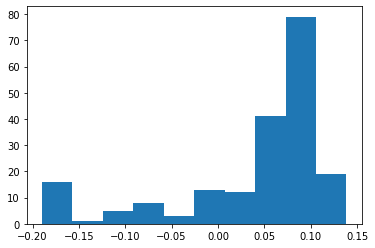

In [ ]:
# calculate PHIF for Heather, Hugin, and Sleipner
phif_heather = phid_heather + A[0] * (df_heather['NPHI'] - phid_heather) + B[0]
phif_hugin = phid_hugin + A[1] * (df_hugin['NPHI'] - phid_hugin) + B[1]
phif_sleipner = phid_sleipner + A[2] * (df_sleipner['NPHI'] - phid_sleipner) + B[2]

# display histogram
plt.hist(phif_heather.values, bins=10)
plt.show()

# Comment: some porosities are negative. This is normal because there are
# densities larger than calcite (> 2.71), while the measurement is in lst. unit
# check max(df_heather['RHOB'])

### 3. Calculate shale volume (VSH)

In [ ]:
# calculate VSH for Heather, Hugin, and Sleipner
vsh_heather = (df_heather['GR'] - GR_min[0]) / (GR_max[0] - GR_min[0])
vsh_hugin = (df_hugin['GR'] - GR_min[1]) / (GR_max[1] - GR_min[1])
vsh_sleipner = (df_sleipner['GR'] - GR_min[2]) / (GR_max[2] - GR_min[2])

# print summary stats
vsh_heather.describe()

count    197.000000
mean       0.592781
std        0.234732
min        0.207053
25%        0.311726
50%        0.714283
75%        0.785841
max        1.061062
Name: GR, dtype: float64

### 4. Calculate water saturation (SW)

In [ ]:
# calculate SW for Heather, Hugin, and Sleipner
sw_heather = ((a[0] * Rw[0]) / ((phif_heather ** m[0]) * df_heather['RT'])) ** (1 / n[0])
sw_hugin = ((a[1] * Rw[1]) / ((phif_hugin ** m[1]) * df_hugin['RT'])) ** (1 / n[1])
sw_sleipner = ((a[2] * Rw[2]) / ((phif_sleipner ** m[2]) * df_sleipner['RT'])) ** (1 / n[2])

# Comment: In Heather most SW result is larger than 1! In Sleipner, some of them
# However this is true because they're in fact water zone
# So, we can mask all SW values larger than 1, to be changed to 1

## create mask
mask_heather_waterzone = (sw_heather >= 1)
mask_hugin_waterzone = (sw_hugin >= 1)
mask_sleipner_waterzone = (sw_sleipner >= 1)

## change anyting larger than 1 with 1 using the mask
sw_heather.loc[mask_heather_waterzone] = 1
sw_hugin.loc[mask_hugin_waterzone] = 1
sw_sleipner.loc[mask_sleipner_waterzone] = 1


### Calculate permeability (KLOGH)

The functions have been prepared for you. The equation used are from the report (p. 13), different for each formation.

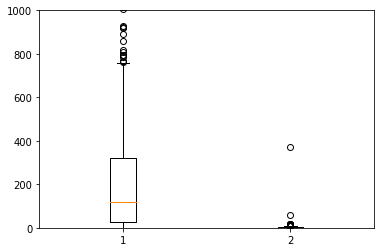

In [ ]:
# There is no equation for Heather Fm., so Heather is not calculated
klogh_hugin = calculate_klogh('hugin', phif_hugin, vsh_hugin)
klogh_sleipner = calculate_klogh('sleipner', phif_sleipner, vsh_sleipner)

# display boxplot
plt.boxplot([klogh_hugin, klogh_sleipner])
plt.ylim(0,1000)
plt.show()

# Comment: there are lots of outliers of Hugin permeability

## Merge the calculated results to original dataframe

In [ ]:
# initiate with NaNs
df['PHIF'] = np.full(len(df), np.nan)
df['VSH'] = np.full(len(df), np.nan)
df['SW'] = np.full(len(df), np.nan)
df['KLOGH'] = np.full(len(df), np.nan)


Before we created masks for Heather, Hugin, and Sleipner. We'll use it again now to insert all the calculated results to replace the NaNs in the dataframe

In [ ]:
df.loc[mask_hugin, 'PHIF'] = phif_hugin
df.iloc[9946,:]

DEPTH                     3594.6
NPHI                        0.23
RHOB                       2.553
GR                        56.027
RT                         7.286
PEF                         7.81
CALI                       8.672
DT                        75.703
FM. LABEL    Hugin Fm. VOLVE Top
PHIF                    0.135257
VSH                          NaN
SW                           NaN
KLOGH                        NaN
Name: 9946, dtype: object

## ***

In [ ]:
df = pd.DataFrame({'val1': [0, 1, 2, 3, 4],
                   'val2': [5, 6, 7, 8, 9],
                   'FM. LABEL': ['heather', 'heather', 'hugin', 'sleipner', 'sleipner']})

mask_heather = df['FM. LABEL'].str.contains('heather')
mask_hugin = df['FM. LABEL'].str.contains('hugin')
mask_sleipner = df['FM. LABEL'].str.contains('sleipner')

df.loc[mask_sleipner, 'val2'] = 10000
df

,val1,val2,FM. LABEL
0,0,5,heather
1,1,6,heather
2,2,7,hugin
3,3,10000,sleipner
4,4,10000,sleipner


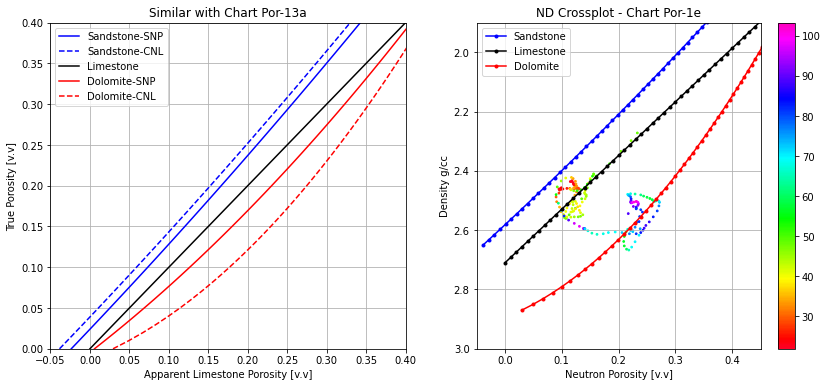

In [ ]:
nphi_rhob_crossplot(0.9)
plt.scatter(df_sleipner['NPHI'], df_sleipner['RHOB'], c=df_sleipner['GR'], s=3, cmap='gist_rainbow')
plt.colorbar()
plt.show()

## Norne

In [ ]:
# clone the github repo python bootcamp for geoengineers
!git clone https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers

Cloning into 'python-bootcamp-for-geoengineers'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 182 (delta 12), reused 0 (delta 0), pack-reused 153
Receiving objects: 100% (182/182), 4.78 MiB | 13.67 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [ ]:
# load well log data

## define the file path from the repo
filepath = '/content/python-bootcamp-for-geoengineers/data/15_9-12.las'

## read the well-log data using lasio
well = lasio.read(filepath)

In [ ]:
# check the available logs inside the data
well.keys()

['DEPT',
 'LITHOLOGY_GEOLINK',
 'CALI',
 'DRHO',
 'NPHI',
 'RHOB',
 'GR',
 'DTC',
 'DTE',
 'RDEP',
 'SP',
 'RSHA',
 'RXO',
 'RMED']

In [ ]:
# look for more detail inside the data
well.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(21386,)),
 CurveItem(mnemonic="LITHOLOGY_GEOLINK", unit="_", value="", descr="Lithology_geolink", original_mnemonic="LITHOLOGY_GEOLINK", data.shape=(21386,)),
 CurveItem(mnemonic="CALI", unit="in", value="", descr="CALI", original_mnemonic="CALI", data.shape=(21386,)),
 CurveItem(mnemonic="DRHO", unit="g/cm3", value="", descr="DRHO", original_mnemonic="DRHO", data.shape=(21386,)),
 CurveItem(mnemonic="NPHI", unit="m3/m3", value="", descr="NPHI", original_mnemonic="NPHI", data.shape=(21386,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="RHOB", original_mnemonic="RHOB", data.shape=(21386,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="GR", original_mnemonic="GR", data.shape=(21386,)),
 CurveItem(mnemonic="DTC", unit="us/ft", value="", descr="DTC", original_mnemonic="DTC", data.shape=(21386,)),
 CurveItem(mnemonic="DTE", unit="us/ft", value="", descr="DTE", origi

### Visualize Logs

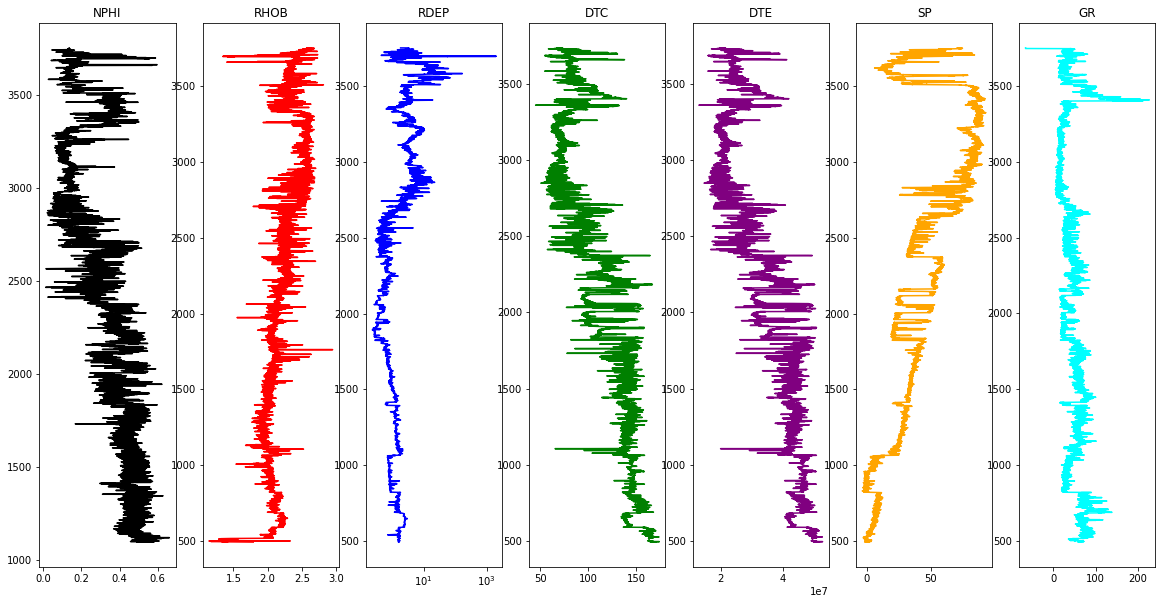

In [ ]:
# define what logs are we going to use: NPHI, RHOB, RDEP, DTC, DTE, SP, GR
logs = ['NPHI', 'RHOB', 'RDEP', 'DTC', 'DTE', 'SP', 'GR']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple', 'orange', 'cyan']

for i in range(len(logs)):
  if i == 2:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPT'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPT'], color=colors[i])
  
  ax[i].set_title(logs[i])

plt.show()

### Create triple combo 

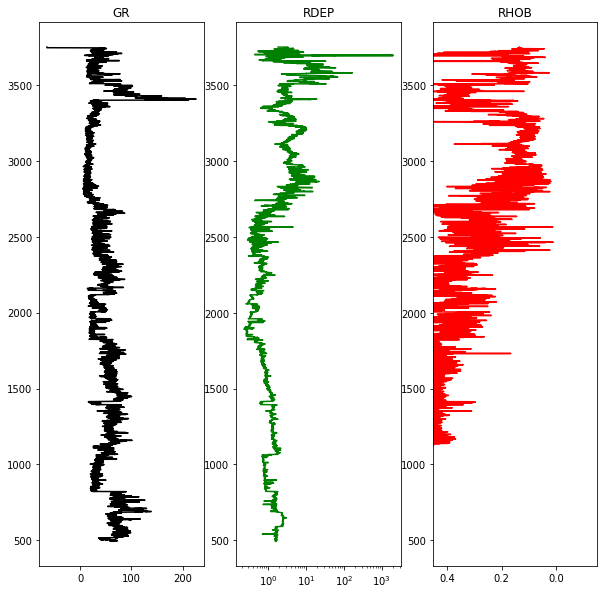

In [ ]:
triple = ['GR', 'RDEP', 'RHOB']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(triple), figsize=(10,10))

# looping each log to display in the subplots

colors = ['black', 'green', 'blue']

for i in range(len(triple)):
  if i == 1:
    # for resistivity, semilog plot
    ax[i].semilogx(well[triple[i]], well['DEPT'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[triple[i]], well['DEPT'], color=colors[i])
  
  ax[i].set_title(triple[i])

ax[2].set_xlim(1.71,2.71)
ax[2].plot(well['NPHI'], well['DEPT'], color='red')
ax[2].set_xlim(0.45, -0.15)

plt.show()